In [85]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('../data/breast_cancer.csv')
# -- Data Prep
#Drop any rows with missing values
df = df.replace('?', np.nan)
df = df.dropna()
#check for any missing or invalid data 
df.info()
print('\n')
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
Index: 683 entries, 0 to 698
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   sample           683 non-null    int64 
 1   clump_thickness  683 non-null    int64 
 2   cell_size        683 non-null    int64 
 3   cell_shape       683 non-null    int64 
 4   adhesion         683 non-null    int64 
 5   epithelial_size  683 non-null    int64 
 6   bare_nuclei      683 non-null    object
 7   bland_chromatin  683 non-null    int64 
 8   normal_nucleoli  683 non-null    int64 
 9   mitoses          683 non-null    int64 
 10  class            683 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 64.0+ KB


sample             0
clump_thickness    0
cell_size          0
cell_shape         0
adhesion           0
epithelial_size    0
bare_nuclei        0
bland_chromatin    0
normal_nucleoli    0
mitoses            0
class              0
dtype: int64


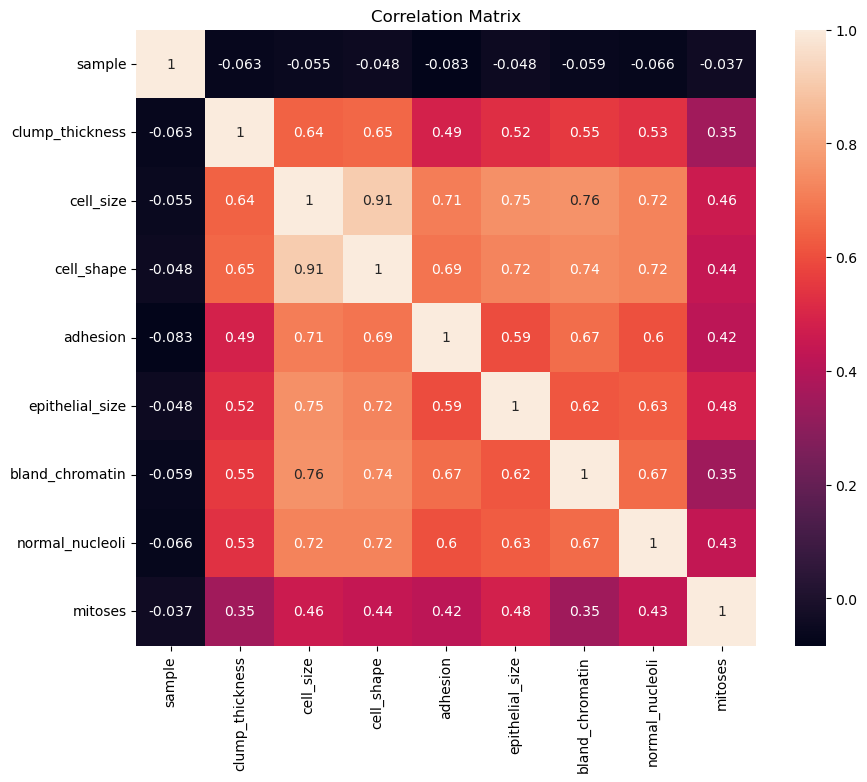

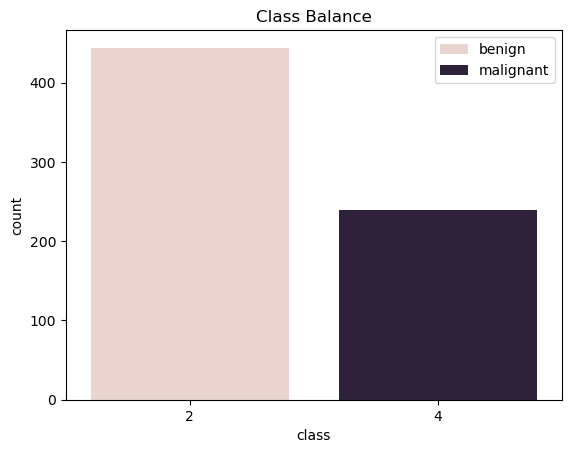

In [86]:
# -- EDA

#Correlation Matrix
plt.figure(figsize=(10, 8))
ig = df.drop(columns=['class'])
sns.heatmap(ig.corr(numeric_only=True), annot=True)
plt.title('Correlation Matrix')
plt.show()

#Class Balance
sns.countplot(x='class', data=df, hue='class')
plt.title('Class Balance')
plt.legend(['benign', 'malignant'])
plt.show()

In [87]:
# -- Data Processing
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

#Seperate features and target
df = df.drop(columns=['sample'])
X = df.drop(columns=['class'])
y = df['class']
#Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=123321, stratify=y)
# -- Train KNN
from sklearn.neighbors import KNeighborsClassifier
#Initilize KNN (default k=5)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

#Prediction
sample = [[6, 2, 3, 1, 2, 1, 1, 1, 1]]
prediction = knn.predict(sample)
print("Prediction:", "Benign" if prediction[0]==2 else "Malignant")

#Score
test_score = knn.score(X_test, y_test)
print(f'test score: {test_score}')

#Classification report
print(classification_report(y_test, knn.predict(X_test)))

Prediction: Benign
test score: 0.9562043795620438
              precision    recall  f1-score   support

           2       0.98      0.96      0.97        89
           4       0.92      0.96      0.94        48

    accuracy                           0.96       137
   macro avg       0.95      0.96      0.95       137
weighted avg       0.96      0.96      0.96       137



c:\Users\rhbyr\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


           Feature      F-Score
5      bare_nuclei  1426.240270
2       cell_shape  1417.643841
1        cell_size  1406.132470
6  bland_chromatin   921.010015
7  normal_nucleoli   727.470805
0  clump_thickness   711.423446
3         adhesion   677.878400
4  epithelial_size   622.157681
8          mitoses   148.787689
class
2    0.650073
4    0.349927
Name: proportion, dtype: float64


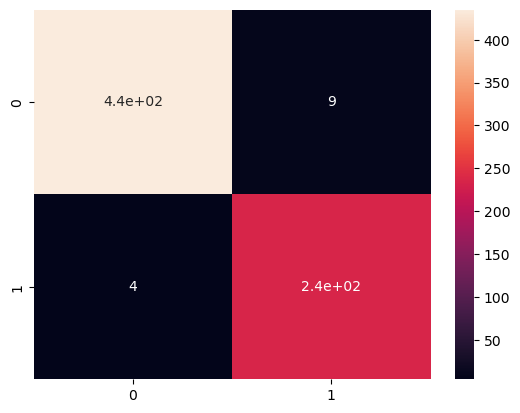

In [88]:
#Using SelectKBest
from sklearn.feature_selection import SelectKBest, f_classif

selector = SelectKBest(score_func=f_classif, k='all')
selector.fit(X,y)

#Get feture scores
scores = pd.DataFrame({
    'Feature': X.columns,
    'F-Score': selector.scores_
}).sort_values(by='F-Score', ascending=False)

print(scores)

#Precentage
counts = df['class'].value_counts(normalize=True)
print(counts)

#Confusion Matrix
from sklearn.metrics import confusion_matrix

model = KNeighborsClassifier()
model.fit(X, y)

cmat = confusion_matrix(y, model.predict(X))
sns.heatmap(cmat, annot=True)
plt.show()


c:\Users\rhbyr\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


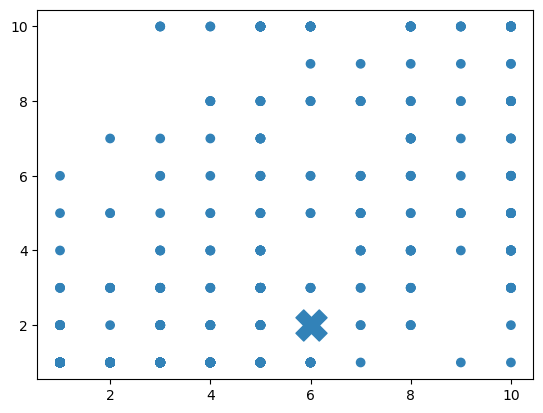

In [89]:
#GuassianNB
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(X, y)

point = np.array([[6, 2, 3, 1, 2, 1, 1, 1, 1]])
pred = model.predict(point)

colors = ['#1b262c' if i == 0 else '#3282b8' for i in y]
pcolor = '#1b262c' if pred == 0 else '#3282b8'

plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=colors)
plt.scatter(point[:, 0], point[:, 1], c=pcolor, s=500, marker='X')
plt.show()